# Utilities

In [1]:
import sys
sys.path.append("/home/desp1/MLCB/src/")

from function import *

In [2]:
import os
os.getcwd()

'/home/desp1/MLCB/notebooks'

In [3]:
file_path = "/home/desp1/MLCB/Assignment-1/data/assignment1_dev_set.csv"
dev = load_data(file_path)

# EDA (Exploratory Data Analysis)


EDA for Development Dataset dataset:
Dataset shape: (489, 141)

Missing values:
 Unnamed: 0                   0
Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 141, dtype: int64

Duplicates: 0

Categorical Columns Summary:
         Project ID Experiment type   Sex Disease MESH ID
count          489             489   489             489
unique           6               1     2               1
top     PRJEB11419    Metagenomics  Male         D006262
freq           271             489   302             489


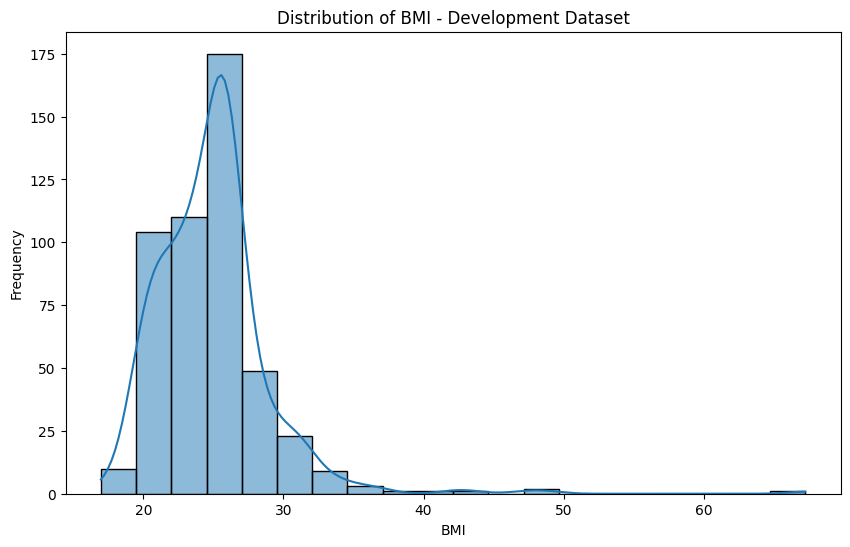

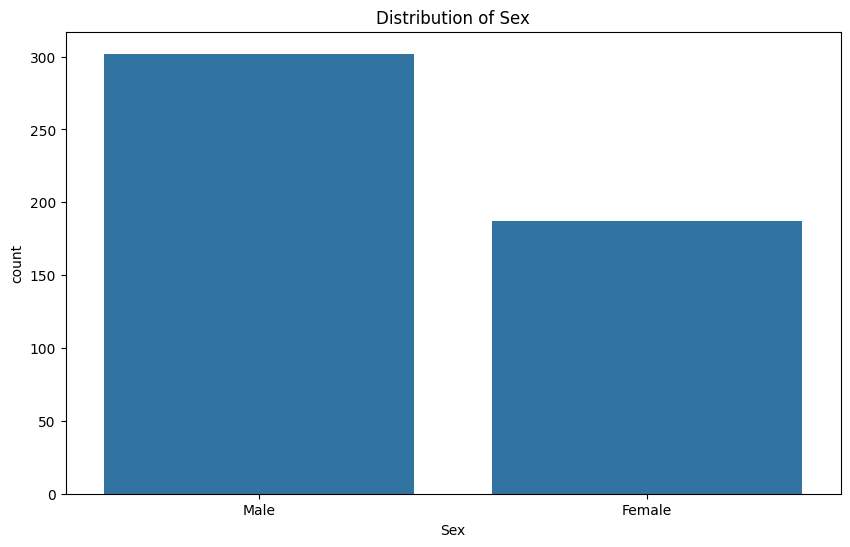

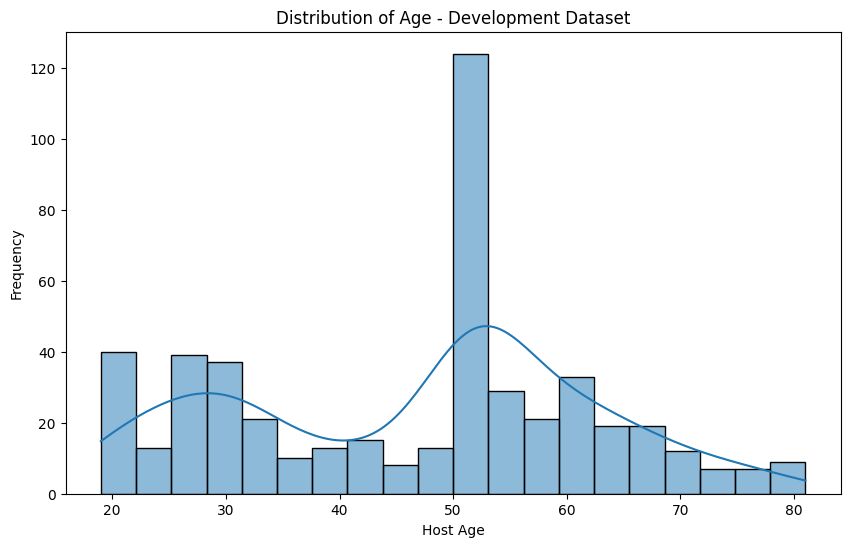

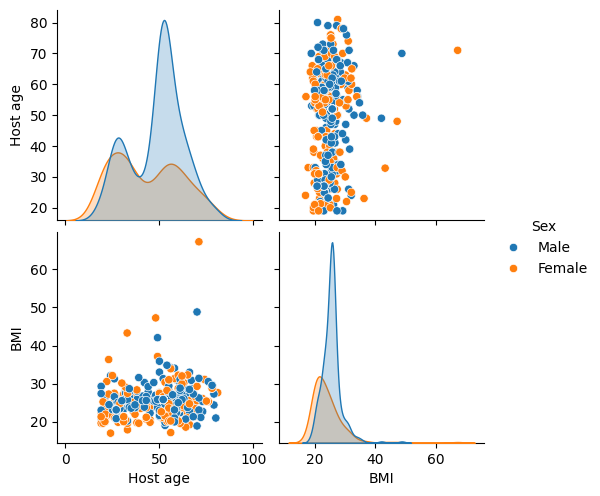

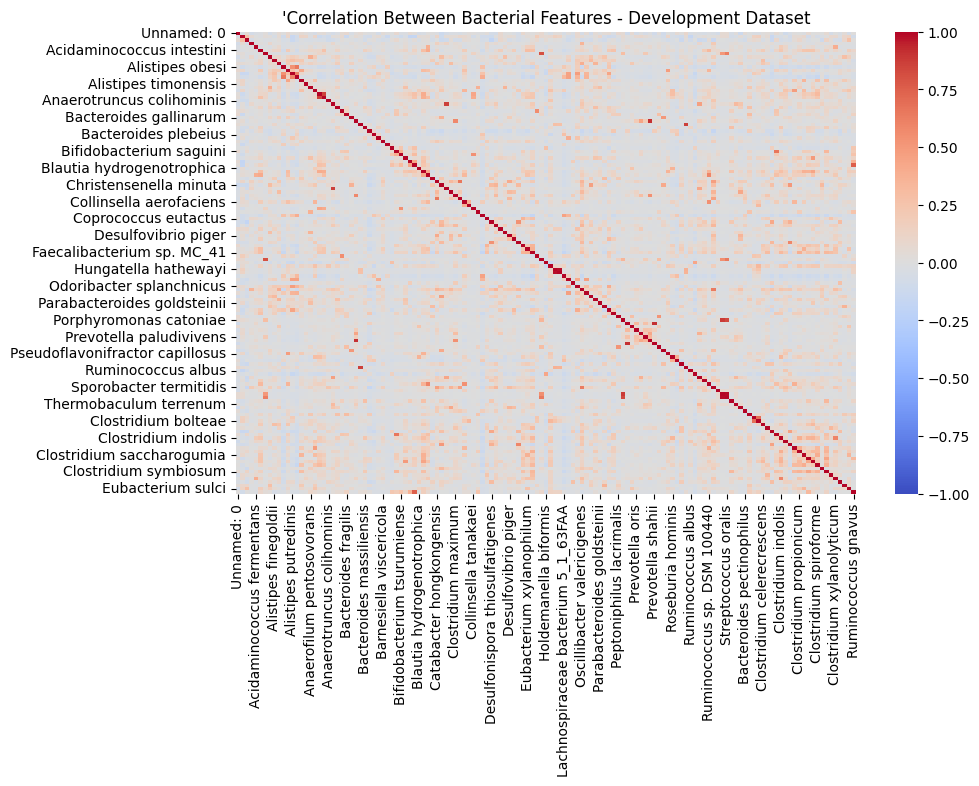

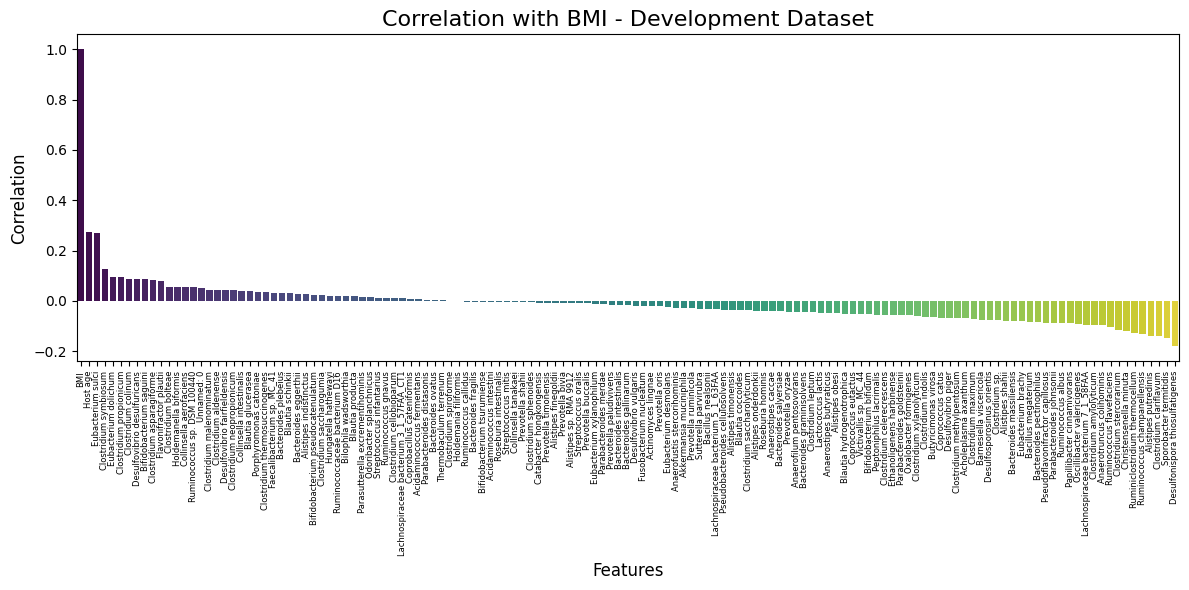

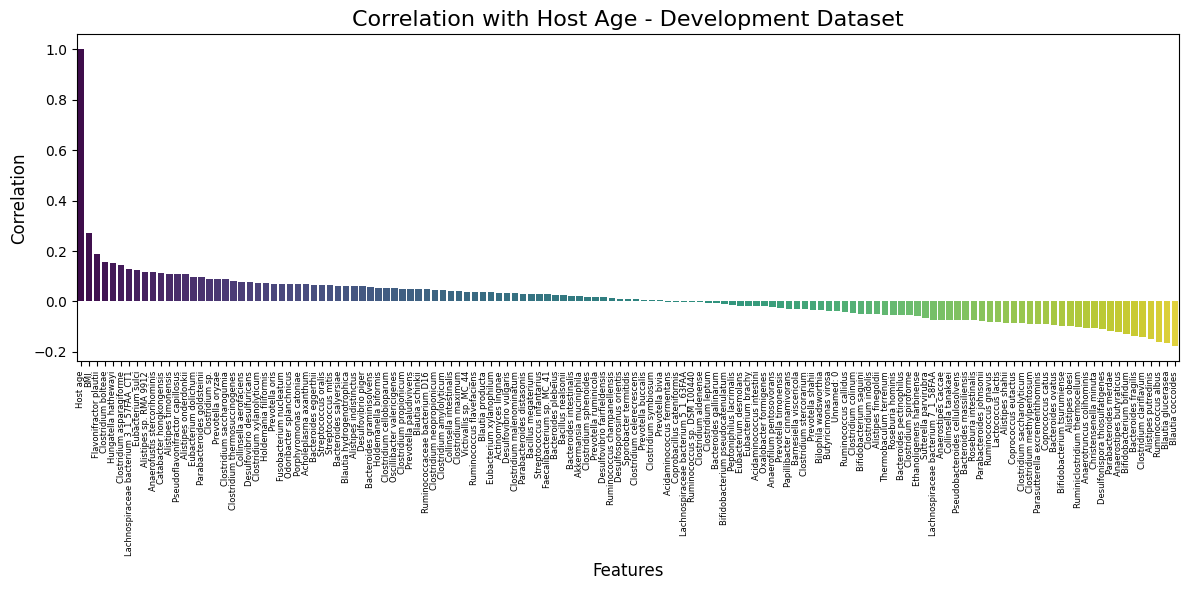

In [4]:
# Use the DataHandler class to load the data
handler = DataHandler(df=dev)
#handler.load_data()
handler.eda(dataset_name= "Development Dataset", target_column="BMI")

In [5]:
file_path = "/home/desp1/MLCB/Assignment-1/data/assignment1_val_set.csv"
eval = load_data(file_path)


EDA for Evaluation Dataset dataset:
Dataset shape: (211, 141)

Missing values:
 Unnamed: 0                   0
Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 141, dtype: int64

Duplicates: 0

Categorical Columns Summary:
         Project ID Experiment type   Sex Disease MESH ID
count          211             211   211             211
unique           5               1     2               1
top     PRJEB11419    Metagenomics  Male         D006262
freq           124             211   142             211


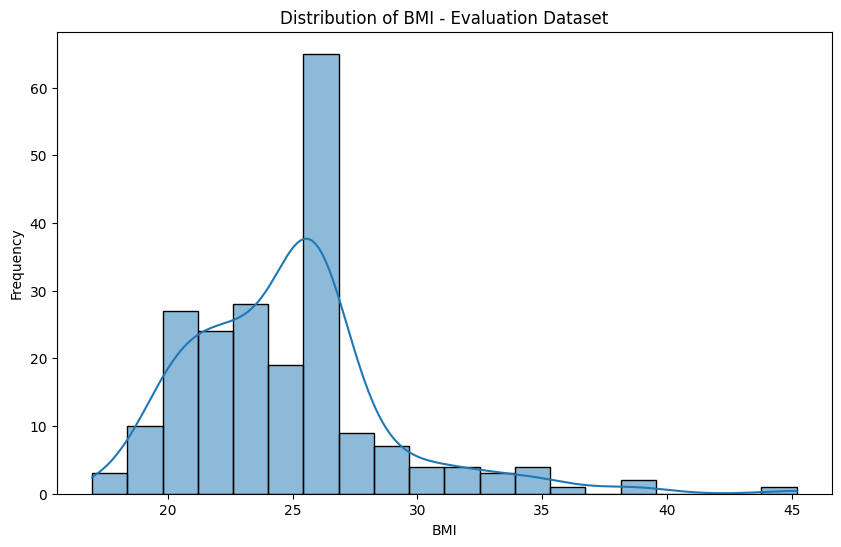

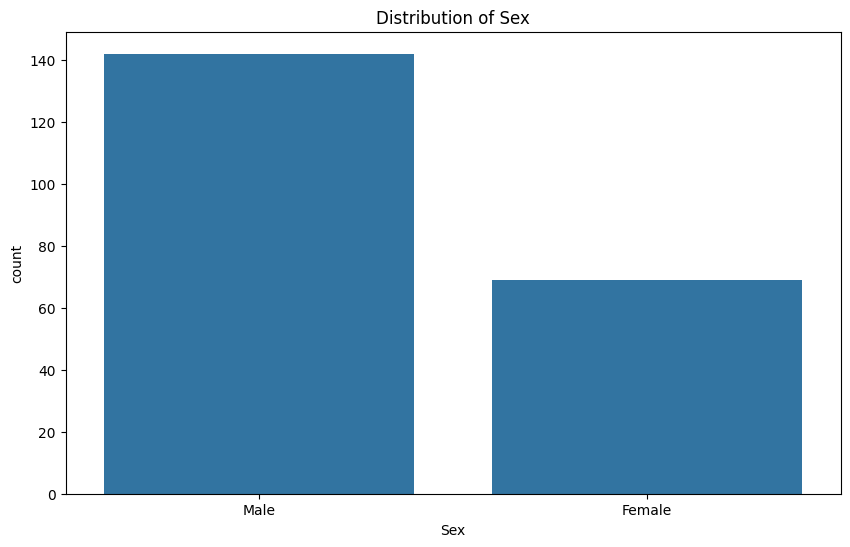

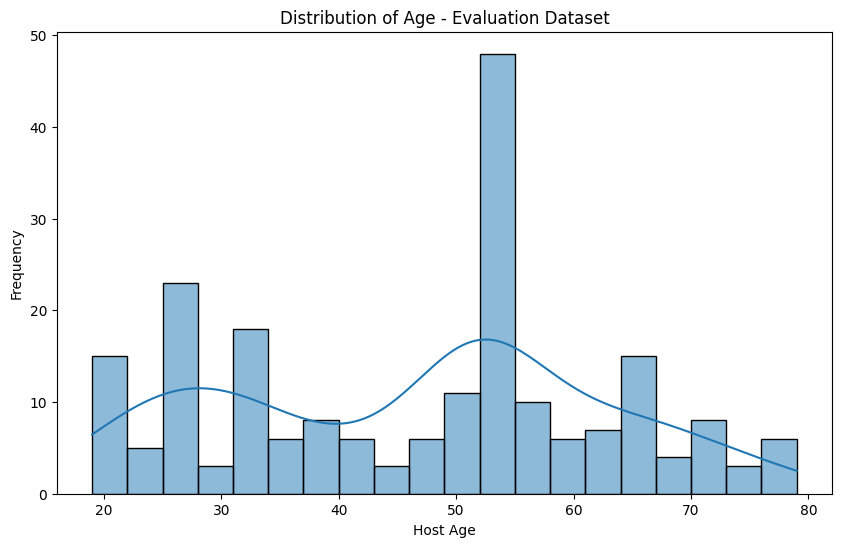

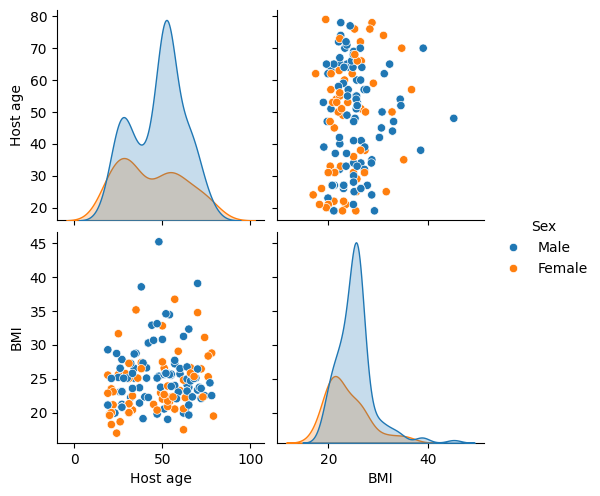

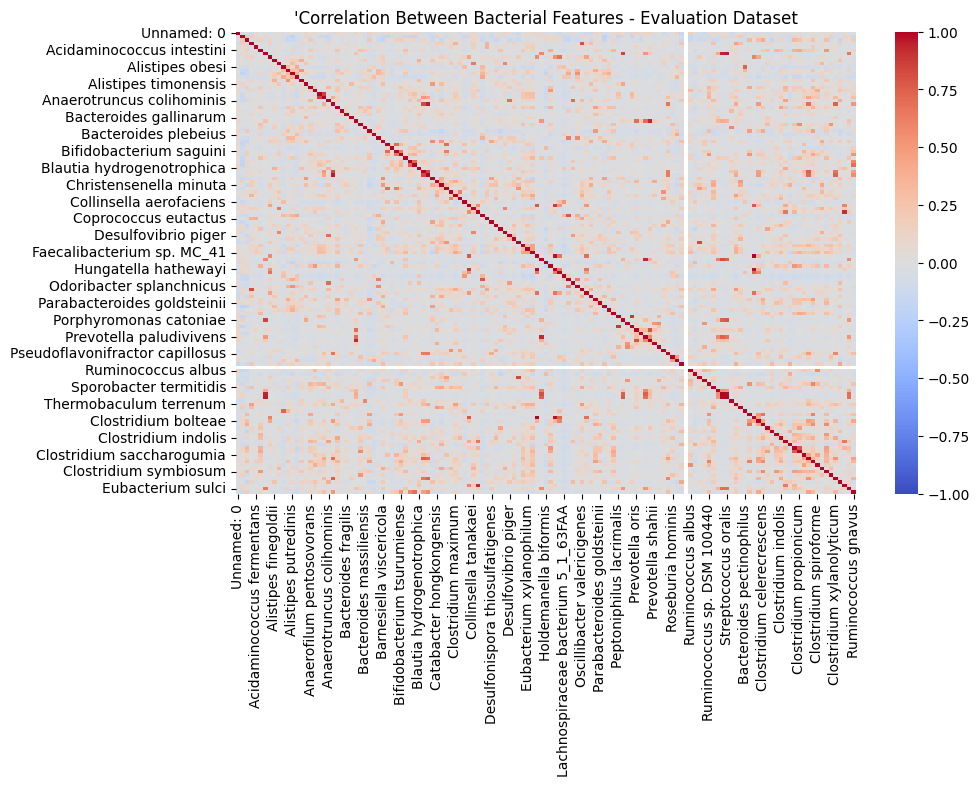

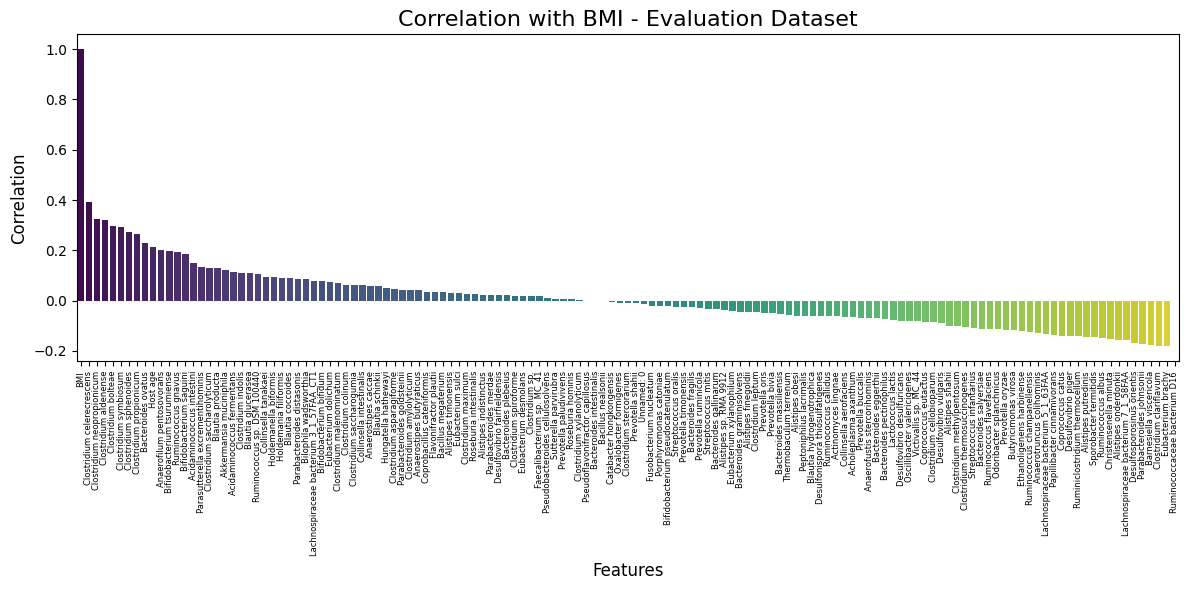

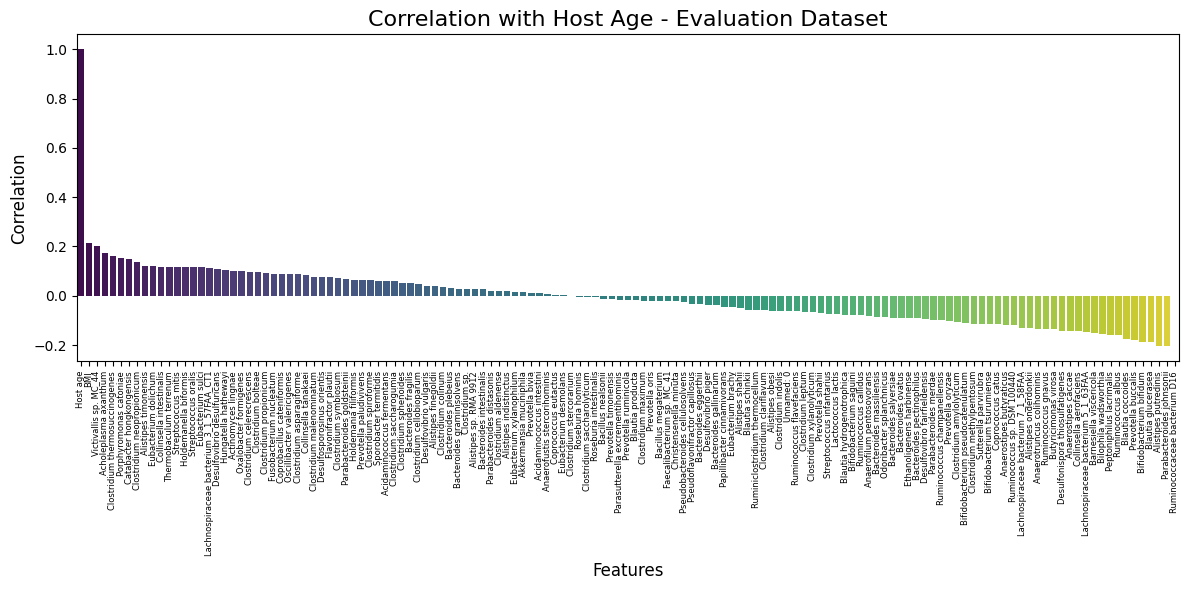

In [6]:
# Use the DataHandler class to load the data
handler = DataHandler(df=eval)
#handler.load_data()
handler.eda(dataset_name= "Evaluation Dataset", target_column="BMI")


The "Categorical columns summary" provides descriptive statistics for the categorical columns in the datasets. In both datasets it is observed: 


- `Project ID`: Unique Values: 6, Most frequent: PRJEB11419 (271 times). This means 6 different projects exist, and "PRJEB11419" is the most common, appearing 271 times.
- `Experiment type`: Unique Values: 1	Most frequent: Metagenomics (489 times).	There's only one type of experiment: "Metagenomics". No variation here.
- `Sex`: Unique Value:2	Most frequent: Male (302 times).	There are two categories ("Male" and "Female"), and "Male" is more frequent (302 samples).
- `Disease MESH ID`: Unique Value: 1, Most frequent:	D006262 (489 times).	There's only one unique disease (MESH ID: D006262), meaning all samples have the same disease.

**Interpretation:**
- `Experiment type` and `Disease MESH ID` have only one unique value, meaning they do not provide useful information for prediction (they can be dropped).

- `Sex` has two unique values, so it can be kept as a categorical feature. (encode using 0,1)

- `Project ID` might be useful depending on whether project-specific differences matter. Here, it’s just an identifier, it can be dropped.

**Also:**
- `Unnamed: 0` : Empty column, can be dropped.

In [7]:
# Drop unnecessary columns
dev_drop = dev.drop(columns=["Unnamed: 0", "Experiment type", "Disease MESH ID", "Project ID"])
eval_drop = eval.drop(columns=["Unnamed: 0","Experiment type", "Disease MESH ID", "Project ID"])

In [8]:
# Check that the columns indeed dropped
print(dev.shape)
print(dev_drop.shape)

(489, 141)
(489, 137)


In [9]:
# Extract features and split the data - Development Dataset
split_data = feature_extraction_and_split(dev_drop, target_column="BMI")
X_train = split_data["X_train"]
X_test = split_data["X_test"]
y_train = split_data["y_train"]
y_test = split_data["y_test"]

# Extract featured - Evaluation dataset
target_column = "BMI"
X_eval = eval_drop.drop(columns=[target_column], axis=1)
y_eval = eval_drop[target_column]

Training set shape: (391, 136), Testing set shape: (98, 136)


In [10]:
# Initialize and fit preprocessor
preprocessor = DataPreprocessor().fit(X_train)

# Transform all datasets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_eval_processed = preprocessor.transform(X_eval)

print("\nData Shapes:")
print(f"Train: {X_train_processed.shape} (processed from {X_train.shape})")
print(f"Test: {X_test_processed.shape} (processed from {X_test.shape})")
print(f"Eval: {X_eval_processed.shape} (processed from {X_eval.shape})")


Data Shapes:
Train: (391, 136) (processed from (391, 136))
Test: (98, 136) (processed from (98, 136))
Eval: (211, 136) (processed from (211, 136))


In [11]:
# Check the preprocessing 
X_train_processed.head()

,Host age,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus,Sex
0,0.376311,-0.153179,-0.156263,-0.366706,-0.258425,-0.346472,-0.285189,-0.392677,0.888286,-0.160709,...,-0.501778,-0.178657,-0.500936,-0.180412,-0.328381,-0.419361,-0.123554,-0.224799,-0.209709,1.0
1,-0.325100,-0.153179,-0.156263,1.552382,-0.258425,-0.343903,-0.431894,-0.364881,-0.234613,-0.350993,...,-0.123864,-0.178657,8.787879,-0.077970,-0.264869,-0.419361,0.338897,-0.224799,2.572999,1.0
2,1.524076,0.256674,0.341850,-0.279147,0.592214,-0.346472,-0.431894,-0.262368,-0.234613,-0.374979,...,-0.377762,-0.178657,-0.179396,0.316986,0.602065,-0.419361,-0.123554,-0.224799,-0.209709,1.0
3,0.376311,-0.131291,-0.156263,-0.366706,-0.258425,-0.341327,-0.374899,-0.392677,-0.234613,-0.384037,...,-0.484748,-0.070979,-0.324315,-0.180412,-0.328381,-0.419361,-0.123554,-0.217663,-0.177053,1.0
4,-0.197571,-0.129320,-0.149014,-0.215704,-0.258425,-0.346472,-0.429070,-0.062695,-0.234613,-0.332607,...,-0.387298,-0.178657,-0.220165,-0.180412,0.048605,0.356347,-0.123554,-0.178125,-0.166992,1.0


In [12]:
# Ensure the "./data" directory exists
os.makedirs("./data", exist_ok=True)

# Reconstruct DataFrames with target variables

# Development Data (Train + Test)
dev_final = pd.concat([
    pd.DataFrame(X_train_processed).assign(BMI=y_train.values),
    pd.DataFrame(X_test_processed).assign(BMI=y_test.values)
], axis=0)

# Evaluation Data
eval_final = pd.DataFrame(X_eval_processed).assign(BMI=y_eval.values)

In [ ]:
train = pd.DataFrame(X_train_processed).assign(BMI=y_train.values)
test = pd.DataFrame(X_test_processed).assign(BMI=y_test.values)
validation = pd.DataFrame(X_eval_processed).assign(BMI=y_eval.values)

train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
validation.to_csv("validation.csv", index=False)

In [ ]:
# Export to CSV
dev_final.to_csv('./data/development_final_data.csv', index=False)
eval_final.to_csv('./data/evaluation_final_data.csv', index=False)

print("Files successfully exported:")
print(f"- ./data/development_final_data.csv ({len(dev_final)} rows)")
print(f"- ./data/evaluation_final_data.csv ({len(eval_final)} rows)")

Files successfully exported:
- ./data/development_final_data.csv (489 rows)
- ./data/evaluation_final_data.csv (211 rows)


In [ ]:
# Verify first 3 rows
print("\nSample of development data:")
print(dev_final.head(3))
print("\nSample of evaluation data:")
print(eval_final.head(3))


Sample of development data:
   Host age  Acholeplasma axanthum  Acidaminococcus fermentans  \
0  0.376311              -0.153179                   -0.156263   
1 -0.325100              -0.153179                   -0.156263   
2  1.524076               0.256674                    0.341850   

   Acidaminococcus intestini  Actinomyces lingnae  Akkermansia muciniphila  \
0                  -0.366706            -0.258425                -0.346472   
1                   1.552382            -0.258425                -0.343903   
2                  -0.279147             0.592214                -0.346472   

   Alistipes finegoldii  Alistipes indistinctus  Alistipes obesi  \
0             -0.285189               -0.392677         0.888286   
1             -0.431894               -0.364881        -0.234613   
2             -0.431894               -0.262368        -0.234613   

   Alistipes onderdonkii  ...  Clostridium stercorarium  \
0              -0.160709  ...                 -0.178657   
1 